# Les k-plus proches voisins

## L'algorithme kNN

On importe les données puis on cherche à prédire la valeur $y^{(0)}$ pour l'observation $x^{(0)} = (x^{(0)}_i)_{i \in [1,p]}$.  
Dans le cas de la classification, cela revient à avoir un $y^{(0)}$ catégorique où les modalités sont les classes.

>1. Initialiser $k$ et choisir une fonction de distance
>2. Pour chaque observation $x^{(i)}$ dans les données:
>>a. Calculer la distance $d$ entre $x^{(0)}$ et $x^{(i)}$  
>>b. Stocker la distance $d$ et l’indice $i$ de l’observation $x^{(i)}$ (dans une liste de couples par exemple)
>4. Trier la liste contenant distances et indices de la plus petite distance à la plus grande (dans ordre croissant).
>5. Sélectionner les $k$ premiers éléments
>6. Obtenir les étiquettes des $k$ entrées sélectionnées
>7. Si **régression**, retourner la moyenne des $k$ valeurs $y^{(i)}$ ; si **classification**, retourner le mode des $k$ classes $y^{(i)}$

### Implémenter l'algorithme des k plus proches voisins dans le cas univarié. Tester cet algorithme sur les données ci-dessous

In [10]:
from math import sqrt

# intialisation de k
k=3

# fonction de distance
def distance_euclidienne(a,b):
    return sqrt((a-b)**2)

# point à prédire
x0 = 21

# jeu de donnée
dataX =  np.array([1,2,3,10,20])
dataY =  np.array([1,2,3,4,5])

# la boucle
voisins = []
for i,x in enumerate(dataX):
    d = distance_euclidienne(x,x0)
    voisins.append((i,d))

# tri de la liste voisins par distance
voisins = sorted(voisins, key = lambda couple : couple[1])

# récupération de kPPV
kNN = voisins[:k]

# récupération des étiquettes (les y) correspondant aux k-PPV
y_kNN = [dataY[couple[0]] for couple in kNN] #[dataY[i] for i,d in kNN]

# si régression
y0_pred = sum(y_kNN)/len(y_kNN)

#si classification: à faire...

In [22]:
from math import sqrt

"""Calcul de la distance euclidienne"""
def distance_euclidienne(a,b):
    return sqrt((a-b)**2)

"""Calcul de la moyenne des valeurs de y correspondant aux k plus proches voisins"""
def moyenne(liste):
    return sum(liste)/len(liste)

"""Calcul du mode des valeurs de y correspondant aux k plus proches voisins"""
def mode(liste):
    return max(set(liste), key = liste.count)

"""Algorithme des plus proches voisins"""
def knn(dataX, dataY, x0, k=3, dist=distance_euclidienne, pred=moyenne):
    # initialisation de la liste voisins
    voisins = []

    # parcours des données et ajout des couples (indices, distances) dans voisins
    for i,x in enumerate(dataX):
        d = distance_euclidienne(x,x0)
        voisins.append((i,d))

    # tri de la liste voisins par distance
    voisins = sorted(voisins, key = lambda couple : couple[1])

    # récupération de kPPV
    kNN = voisins[:k]

    # récupération des étiquettes (les y) correspondant aux k-PPV
    y_kNN = [dataY[couple[0]] for couple in kNN] #[dataY[i] for i,d in kNN]

    # retour de la prediction et des kPPV
    return kNN, y_kNN, pred(y_kNN)

In [23]:
# Données de régression
# Colonne 0: taille (cm)
# Colonne 1: poids (kg)
from math import sqrt
import numpy as np
reg_data = np.array([
    [167. ,  50.8],
    [181.7,  61.4],
    [176.3,  68.9],
    [173.3,  64.1],
    [172.2,  64.9],
    [174.5,  55.5],
    [177.3,  63.7],
    [177.8,  61.4],
    [172.5,  50.6],
    [168.9,  57.4]])

dataX = reg_data[:,0]
dataY = reg_data[:,1]
x0 = 172.6

knn(dataX, dataY, x0, k=3, dist=distance_euclidienne, pred=moyenne)

([(8, 0.09999999999999432), (4, 0.4000000000000057), (3, 0.700000000000017)],
 [50.6, 64.9, 64.1],
 59.86666666666667)

In [25]:
# Données de Classification
# Colonne 0: age
# Colonne 1: aime l'ananas dans la pizza

import numpy as np
clf_data = np.array([
   [22, 1],
   [23, 1],
   [21, 1],
   [18, 1],
   [19, 1],
   [25, 0],
   [27, 0],
   [29, 0],
   [31, 0],
   [45, 0],
   [23, 0]
])

dataX = clf_data[:,0]
dataY = clf_data[:,1]
x0 = 17

knn(dataX, dataY, x0, k=3, dist=distance_euclidienne, pred=mode)

([(3, 1.0), (4, 2.0), (2, 4.0)], [1, 1, 1], 1)

### Généraliser à des données multivariées et tester sur le dataset iris.csv

En 1936, Edgar Anderson a collecté des données sur 3 espèces d'iris : "iris setosa", "iris virginica" et "iris versicolor"

<img src="iris_setosa.jpeg"><img src="iris_virginica.jpeg"><img src="iris_versicolor.jpeg">

Pour chaque iris étudié, Anderson a mesuré (en cm) :
- la largeur des sépales
- la longueur des sépales
- la largeur des pétales
- la longueur des pétales

In [77]:
import pandas as pd
df = pd.read_csv('Iris.csv')

In [78]:
dataX = df.iloc[:,:4]
dataY = df.Name

In [79]:
from math import sqrt

"""Calcul de la distance euclidienne"""
def distance_euclidienne(a,b):
    if len(a)==len(b):
        d = 0
        for i in range(len(a)):
            d += (a[i]-b[i])**2
        return sqrt(d)
    else:
        print("Problème de dimensions !")

"""Calcul de la moyenne des valeurs de y correspondant aux k plus proches voisins"""
def moyenne(liste):
    return sum(liste)/len(liste)

"""Calcul du mode des valeurs de y correspondant aux k plus proches voisins"""
def mode(liste):
    return max(set(liste), key = liste.count)

"""Algorithme des plus proches voisins"""
def knn(dataX, dataY, x0, k=3, dist=distance_euclidienne, pred=moyenne):
    # initialisation de la liste voisins
    voisins = []

    # parcours des données et ajout des couples (indices, distances) dans voisins       
    for i in dataX.index:
        d = distance_euclidienne(dataX.loc[i,:],x0)
        voisins.append((i,d))
        
    # tri de la liste voisins par distance
    voisins = sorted(voisins, key = lambda couple : couple[1])

    # récupération de kPPV
    kNN = voisins[:k]

    # récupération des étiquettes (les y) correspondant aux k-PPV
    y_kNN = [dataY[couple[0]] for couple in kNN] #[dataY[i] for i,d in kNN]

    # retour de la prediction et des kPPV
    return pred(y_kNN)

In [80]:
# on teste le modèle sur une nouvelle fleur
knn(dataX, dataY, [7,4,2,2], k=3, dist=distance_euclidienne, pred=mode)

'Iris-setosa'

In [81]:
# On teste le modèle sur une fleur (la dernière du dataset)
x0= dataX.iloc[-1,:]
knn(dataX.iloc[:-1,:], dataY.iloc[:-1], x0, k=3, dist=distance_euclidienne, pred=mode)

'Iris-virginica'

#### Mesurer le score du modèle pour un k donné (en utilisant un jeu de données test) puis comparer ce score pour différents k

In [82]:
#Méthode 1 pour création des échantillons test/train
df_test = df.sample(frac=0.2)
mask = ~df.index.isin(df_test.index)
df_train = df[mask]
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [83]:
#Méthode 2 pour création des échantillons test/train
df_mixed = df.sample(frac=1)
df_test = df.iloc[:30,:]
df_train = df.iloc[30:,:]
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [84]:
# Méthode 3 pour création des échantillons test/train : avec Scikit-learn
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.2, stratify=df.Name, random_state=123456)
df_test.shape, df_train.shape

((30, 5), (120, 5))

In [85]:
dataX = df.drop(['Name'], axis=1)
dataY = df['Name']

In [86]:
# Méthode 4 pour création des échantillons test/train : avec Scikit-learn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [87]:
# Découpage train/test
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)

# Prédictions sur le test set
k=3
y_pred=list()
for i,r in X_test.iterrows():
    y_pred.append(knn(X_train, y_train, r, k=k, dist=distance_euclidienne, pred=mode))
y_pred2 = pd.Series(y_pred, index=y_test.index)

# Mesure de la qualité du modèle
sum(y_pred==y_test)/len(y_pred)

0.9666666666666667

In [88]:
scores = []
for k in range(1,31):
    # Découpage train/test
    X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)

    # Prédictions sur le test set
    y_pred=list()
    for i,r in X_test.iterrows():
        y_pred.append(knn(X_train, y_train, r, k=k, dist=distance_euclidienne, pred=mode))
    y_pred2 = pd.Series(y_pred, index=y_test.index)

    # Mesure de la qualité du modèle
    scores.append(sum(y_pred==y_test)/len(y_pred))

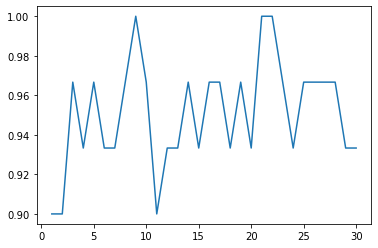

In [90]:
import matplotlib.pyplot as plt
plt.plot(range(1,31), scores);

In [92]:
%%time
# Problème : pour chaque k, on a une seule mesure donc l'idée est de répeter la mesure plusieurs fois
# (pour plusieurs tirages différents !)
scores = []
for k in [1,5,10,15,20,25,30,35]:
    scores_k = []
    for i in range(100):
        # Découpage train/test
        X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.2, stratify=dataY)

        # Prédictions sur le test set
        y_pred=list()
        for i,r in X_test.iterrows():
            y_pred.append(knn(X_train, y_train, r, k=k, dist=distance_euclidienne, pred=mode))
        y_pred2 = pd.Series(y_pred, index=y_test.index)

        # Mesure de la qualité du modèle
        scores_k.append(sum(y_pred==y_test)/len(y_pred))
        
    scores.append(sum(scores_k)/len(scores_k))

CPU times: user 3min 41s, sys: 3.67 ms, total: 3min 41s
Wall time: 3min 41s


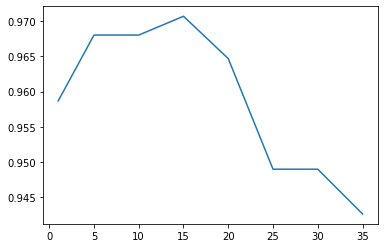

In [93]:
import matplotlib.pyplot as plt
plt.plot([1,5,10,15,20,25,30,35], scores);

### Utiliser votre algorithme des kNN pour effectuer des recommendations de films : pour un film donné, l'algorithme doit renvoyer les 5 films les plus "proches"

In [140]:
import pandas as pd
films = pd.read_csv('Movie-Ratings.csv')
#on peut renommer les colonnes pour que ce soit plus simple d'utilisation
films.columns = ['Film', 'Genre', 'RT', 'Audience', 'Budget', 'Year']
#on peut choisir de travailler avec les noms de films comme index
films.set_index('Film',inplace=True)
films.head(50)

,Genre,RT,Audience,Budget,Year
Film,,,,,
(500) Days of Summer,Comedy,87,81,8,2009
"10,000 B.C.",Adventure,9,44,105,2008
12 Rounds,Action,30,52,20,2009
127 Hours,Adventure,93,84,18,2010
17 Again,Comedy,55,70,20,2009
2012,Action,39,63,200,2009
27 Dresses,Comedy,40,71,30,2008
30 Days of Night,Horror,50,57,32,2007
30 Minutes or Less,Comedy,43,48,28,2011


In [141]:
dum = pd.get_dummies(films.Genre)
films = pd.concat([films.drop('Genre', axis=1),dum],axis=1)
films

,RT,Audience,Budget,Year,Action,Adventure,Comedy,Drama,Horror,Romance,Thriller
Film,,,,,,,,,,,
(500) Days of Summer,87,81,8,2009,0,0,1,0,0,0,0
"10,000 B.C.",9,44,105,2008,0,1,0,0,0,0,0
12 Rounds,30,52,20,2009,1,0,0,0,0,0,0
127 Hours,93,84,18,2010,0,1,0,0,0,0,0
17 Again,55,70,20,2009,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
Your Highness,26,36,50,2011,0,0,1,0,0,0,0
Youth in Revolt,68,52,18,2009,0,0,1,0,0,0,0
Zodiac,89,73,65,2007,0,0,0,0,0,0,1


In [127]:
# On va normaliser les colonnes pour qu'elles soient toutes entre 0 et 1 (comme les indicatrices !)
def norm(col):
    return (col-min(col))/(max(col)-min(col))
films.apply(norm, axis=0)

,RT,Audience,Budget,Year,Action,Adventure,Comedy,Drama,Horror,Romance,Thriller
Film,,,,,,,,,,,
(500) Days of Summer,0.896907,0.843750,0.026667,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0
"10,000 B.C.",0.092784,0.458333,0.350000,0.25,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12 Rounds,0.309278,0.541667,0.066667,0.50,1.0,0.0,0.0,0.0,0.0,0.0,0.0
127 Hours,0.958763,0.875000,0.060000,0.75,0.0,1.0,0.0,0.0,0.0,0.0,0.0
17 Again,0.567010,0.729167,0.066667,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
Your Highness,0.268041,0.375000,0.166667,1.00,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Youth in Revolt,0.701031,0.541667,0.060000,0.50,0.0,0.0,1.0,0.0,0.0,0.0,0.0
Zodiac,0.917526,0.760417,0.216667,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [130]:
# autre méthode
films_norm = (films - films.min())/(films.max()-films.min())

In [145]:
from math import sqrt

"""Calcul de la distance euclidienne"""
def distance_euclidienne(a,b):
    if len(a)==len(b):
        d = 0
        for i in range(len(a)):
            d += (a[i]-b[i])**2
        return sqrt(d)
    else:
        print("Problème de dimensions !")

"""Algorithme des plus proches voisins"""
def knn(nom_film, films = films, k=6, dist=distance_euclidienne):
    # normalisation des données
    films_norm = (films - films.min())/(films.max()-films.min())
    
    # initialisation de la liste voisins
    voisins = []

    # parcours des données et ajout des couples (indices, distances) dans voisins       
    for film in films.index:
        d = distance_euclidienne(films_norm.loc[film],films_norm.loc[nom_film])
        voisins.append((film,d))
        
    # tri de la liste voisins par distance
    voisins = sorted(voisins, key = lambda couple : couple[1])

    # retourne les k-plus proches films
    return voisins[1:k]

In [148]:
knn('Zodiac', films=films.drop('Year', axis=1))

[('Contagion', 0.11741168053022824),
 ('Michael Clayton', 0.1341363706916608),
 ('Source Code', 0.1414248048449073),
 ('Tinker Tailor Soldier Spy', 0.16748106951570635),
 ('The Ides of March', 0.1808908689408588)]

### Maintenant que vous l'avez bien compris, implémenté, testé et validé, vous pouvez chercher les implémentations existantes de cet algorithme dans Python...

In [150]:
data = pd.read_csv('Iris.csv')
X = data.drop('Name', axis=1)
y = data['Name']

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 4), (38, 4), (112,), (38,))

In [165]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5, algorithm='brute')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test)

5